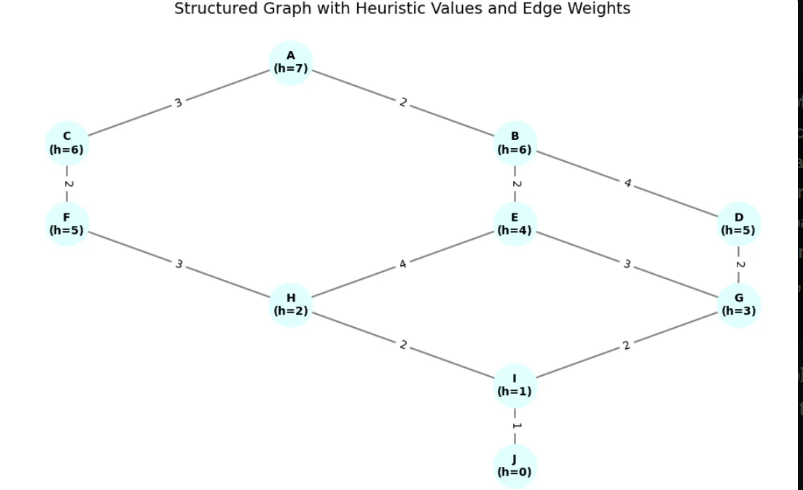

<ul>
<li> show all the possible paths from source to goal with total costs of each path </li>
<li> show the optimal one among these paths and path cost </li>
<li> find all the paths with cost 11 </li>
<li> From multiple path, how your code finds this specific path for question ii </li>

In [2]:
import heapq


graph = {
    'A': [('B', 2), ('C', 3)],
    'B': [('D', 2), ('L', 4)],
    'C': [('E', 2)],
    'D': [('F', 4), ('H', 4)],
    'E': [('H', 3)],
    'F': [('G', 3)],
    'G': [('I', 2)],
    'H': [('I', 2)],
    'I': [('J', 1)],
    'L': [('G', 2)],
    'J': []
}


h = {
    'A': 7,
    'B': 6,
    'C': 6,
    'E': 5,
    'D': 4,
    'L': 5,
    'H': 2,
    'F': 5,
    'G': 3,
    'I': 1,
    'J': 0
}

def find_all_paths(start, goal):
   
    all_paths = []
    
    def dfs(node, path, cost):
        if node == goal:
            all_paths.append((path.copy(), cost))
            return
        
        for neighbor, weight in graph[node]:
            if neighbor not in path:  
                path.append(neighbor)
                dfs(neighbor, path, cost + weight)
                path.pop()  
    
    dfs(start, [start], 0)
    return all_paths

def astar(start, goal):
    
    pq = [(h[start], 0, start, [start])]
    best_g = {start: 0}
    
    while pq:
        f, g, curr, path = heapq.heappop(pq)
        
        if curr == goal:
            return path, g
            
        for neigh, w in graph[curr]:
            g2 = g + w
            if g2 < best_g.get(neigh, float('inf')):
                best_g[neigh] = g2
                f2 = g2 + h[neigh]
                heapq.heappush(pq, (f2, g2, neigh, path + [neigh]))
    
    return None, float('inf')

def find_paths_with_cost(start, goal, target_cost):
    
    all_paths = find_all_paths(start, goal)
    return [path for path, cost in all_paths if cost == target_cost]

def print_paths_analysis():
    start = 'A'
    goal = 'J'
    
    # 1. Find all possible paths with their costs
    all_paths = find_all_paths(start, goal)
    print("All possible paths from A to J:")
    for path, cost in all_paths:
        print(f"Path: {' -> '.join(path)}, Cost: {cost}")
    
    # 2. Find and show the optimal path
    optimal_path, optimal_cost = astar(start, goal)
    print("\nOptimal path found by A*:")
    print(f"Path: {' -> '.join(optimal_path)}, Cost: {optimal_cost}")
    
    # 3. Find paths with cost 11
    target_cost = 11
    paths_with_target_cost = find_paths_with_cost(start, goal, target_cost)
    print(f"\nPaths with cost {target_cost}:")
    for path in paths_with_target_cost:
        print(f"Path: {' -> '.join(path)}")
    

print_paths_analysis()

All possible paths from A to J:
Path: A -> B -> D -> F -> G -> I -> J, Cost: 14
Path: A -> B -> D -> H -> I -> J, Cost: 11
Path: A -> B -> L -> G -> I -> J, Cost: 11
Path: A -> C -> E -> H -> I -> J, Cost: 11

Optimal path found by A*:
Path: A -> B -> D -> H -> I -> J, Cost: 11

Paths with cost 11:
Path: A -> B -> D -> H -> I -> J
Path: A -> B -> L -> G -> I -> J
Path: A -> C -> E -> H -> I -> J


In [ ]:
def find_all_paths(start,goal):
    all_paths = []
    def dfs(node,path,cost):
        if node == goal:
            all_paths.append((path.copy(),cost))
            return
        for neigh, weight in graph[node]:
            if neigh not in path:
                path.append(neigh)
                dfs(neigh,path,cost+weight)
                path.pop()
    dfs(start,[start],0)
    return all_paths

def astar(start,goal):
    pq = [(h[start],0,start,[start])]
    best_g = {start:0}
    while pq:
        f,g,curr,path = heapq.heappop(pq)
        if curr == goal:
            return path,g
        for neigh,w in graph[curr]:
            g2 = g +w
            if g2<best_g.get(neigh,float('inf')):
                best_g[neigh] = g2
                f2 = g2 + h[neigh]
                heapq.heappush(pq,(f2,g2,neigh,path+[neigh]))

    return None,float('inf')

def find_path_with_Cost(start,goal,target_cost):
    paths = find_all_paths(start,goal)
    return [path for path,cost in paths if cost==target_cost]

def paths_analysis():
    start = 'a'
    goal = 'j'
